In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)
import pickle

In [4]:
tf.__version__

'2.17.0'

#### EDA

In [6]:
df = pd.read_csv(r"E:\DS_Advanced_NLP_Deep_Learning\DL_Projects\Fuel_Efficiency_Prediction\Dataset.txt",na_values='?')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
df['car name'].unique()

array(['chevrolet chevelle malibu ', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'chevrolet chevelle malibu',
       'ford torino 500', 'amc matador', 'pontiac catalina brougham',
       'dodge monaco (sw)', 'ford country squire (sw)',
       'pontiac safari (sw)', 'amc hornet sportabout (sw)',
       'chevrolet vega (sw)', 'pontiac firebird', 'ford mustang',
       'mercury capri 20

In [13]:
df.drop(['car name'],axis=1,inplace=True)

#### Splitting the data into train and test

In [14]:
X=df.drop("mpg",axis=1)
Y=df['mpg']
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [16]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [17]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
274,5,131.0,103.0,2830,15.9,78,2
157,8,350.0,145.0,4440,14.0,75,1
173,4,119.0,97.0,2545,17.0,75,3
357,4,119.0,100.0,2615,14.8,81,3
263,6,231.0,165.0,3445,13.4,78,1


In [18]:
Y.head(0)

Series([], Name: mpg, dtype: float64)

#### Standard scaling the data

In [19]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
X_train_std

array([[-0.24893345, -0.57765698, -0.02197412, ...,  0.11961844,
         0.54658592,  0.49337407],
       [ 1.52188861,  1.52787598,  1.06400983, ..., -0.55787761,
        -0.26938257, -0.74203461],
       [-0.83920747, -0.69302865, -0.17711468, ...,  0.51185299,
        -0.26938257,  1.72878276],
       ...,
       [ 0.34134057, -0.17385614,  0.15902321, ..., -1.05708522,
         1.36255441, -0.74203461],
       [ 1.52188861,  1.43173292,  1.45186124, ..., -2.6973388 ,
        -1.62933005, -0.74203461],
       [-0.83920747, -0.79878601, -0.74596341, ...,  0.44053762,
         1.36255441,  1.72878276]])

In [30]:
pickle.dump(sc, open(r'E://DS_Advanced_NLP_Deep_Learning//DL_Projects//Fuel_Efficiency_Prediction//models//scaler.pkl', 'wb'))

In [21]:
Y_train

274    20.3
157    15.0
173    24.0
357    32.9
263    17.7
       ... 
64     15.0
328    30.0
341    23.5
11     14.0
356    32.4
Name: mpg, Length: 313, dtype: float64

In [22]:
Y_test

39     14.0
285    17.0
164    21.0
220    33.5
163    18.0
       ... 
17     21.0
82     23.0
58     25.0
344    39.0
283    20.2
Name: mpg, Length: 79, dtype: float64

In [23]:
X_train.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [24]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 64,activation='relu',input_shape=[len(X_train.keys())]))
# Adding the second hidden layer
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units=1))
# Adding the output layer

# Compiling the ANN
model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

c:\Users\Sahishnuta\anaconda3\envs\fuel\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Fitting the ANN to the Training set
model_history=model.fit(X_train_std, Y_train, batch_size = 100,epochs = 1000)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 634.0713 - mean_absolute_error: 23.8931 - mean_squared_error: 634.0713
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 596.5356 - mean_absolute_error: 23.1451 - mean_squared_error: 596.5356  
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 577.7418 - mean_absolute_error: 22.6957 - mean_squared_error: 577.7418 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 554.0475 - mean_absolute_error: 22.2233 - mean_squared_error: 554.0475 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 543.4052 - mean_absolute_error: 21.9776 - mean_squared_error: 543.4052 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 498.1223 - mean_absolute_error: 20.9653 - mean_squared_error: 498.1223 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 447.1922 - mean_absolute_error: 19.7188 - mean_squared_error: 447.1922  
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 373.4350 - mean_absolute_error

In [27]:
prediction=model.predict(X_test_std)
prediction

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


array([[14.142709],
       [17.624191],
       [19.677195],
       [31.503223],
       [19.006231],
       [16.04022 ],
       [32.088116],
       [18.374641],
       [19.483583],
       [25.429039],
       [23.829332],
       [26.75702 ],
       [28.735815],
       [34.37369 ],
       [22.887432],
       [19.652683],
       [13.052863],
       [22.718521],
       [11.956346],
       [16.67099 ],
       [27.761124],
       [21.176075],
       [19.214508],
       [13.753824],
       [29.733147],
       [29.10347 ],
       [21.61523 ],
       [13.225053],
       [19.287514],
       [15.502192],
       [35.77362 ],
       [35.99353 ],
       [33.296585],
       [26.17331 ],
       [32.00177 ],
       [24.776749],
       [23.633268],
       [16.08628 ],
       [11.162638],
       [28.615341],
       [32.240128],
       [23.959747],
       [15.746232],
       [11.70156 ],
       [13.332021],
       [26.026981],
       [27.433138],
       [18.613506],
       [14.164031],
       [19.91265 ],


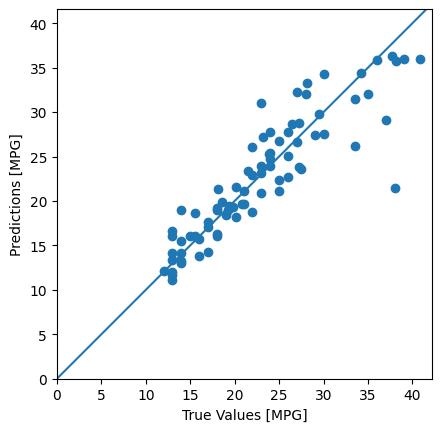

In [28]:
plt.scatter(Y_test,prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [29]:
model.save(r"E://DS_Advanced_NLP_Deep_Learning//DL_Projects//Fuel_Efficiency_Prediction//models//model.h5")

In [31]:
rmse=np.sqrt(mean_squared_error(Y_test,prediction))

print('RMSE: ',rmse)

print('R_square:', r2_score(Y_test,prediction))

RMSE:  3.298759225780544
R_square: 0.800343320097487


#### Let's predict for a single car

In [32]:
list1=[[4,97,100,5000,14.5,70,3]]
list1=sc.transform(list1)
list1

c:\Users\Sahishnuta\anaconda3\envs\fuel\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.83920747, -0.90454337, -0.0995444 ,  2.42535646, -0.37958917,
        -1.62933005,  1.72878276]])

In [33]:
prediction2=model.predict(list1)
prediction2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[25.84121]], dtype=float32)

In [34]:
list2=[[8,307,130,3504,12,70,1]]
list2=sc.transform(list2)
list2

c:\Users\Sahishnuta\anaconda3\envs\fuel\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.52188861,  1.11446083,  0.67615842,  0.64959007, -1.27103134,
        -1.62933005, -0.74203461]])

In [35]:
prediction3=model.predict(list2)
prediction3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[17.92385]], dtype=float32)